In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv("../data/Salary_Data.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Prompt Engineer,24000,USD,24000,IT,100,US,M
1,2025,EX,FT,Head of AI,238000,USD,238000,US,0,US,M
2,2025,EX,FT,Head of AI,214000,USD,214000,US,0,US,M
3,2025,SE,FT,Platform Engineer,240000,USD,240000,US,0,US,M
4,2025,SE,FT,Platform Engineer,140000,USD,140000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133022 entries, 0 to 133021
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133022 non-null  int64 
 1   experience_level    133022 non-null  object
 2   employment_type     133022 non-null  object
 3   job_title           133022 non-null  object
 4   salary              133022 non-null  int64 
 5   salary_currency     133022 non-null  object
 6   salary_in_usd       133022 non-null  int64 
 7   employee_residence  133022 non-null  object
 8   remote_ratio        133022 non-null  int64 
 9   company_location    133022 non-null  object
 10  company_size        133022 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133022.000000,1.330220e+05,133022.000000,133022.000000
mean,2024.357129,1.633427e+05,157664.054382,20.922479
std,0.680880,2.176285e+05,74313.046183,40.601908
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060800e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146400.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.loc[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6,2025,SE,FT,Platform Engineer,140000,USD,140000,US,0,US,M
7,2025,SE,FT,Platform Engineer,217000,USD,217000,US,0,US,M
8,2025,SE,FT,Platform Engineer,140000,USD,140000,US,0,US,M
62,2025,SE,FT,Data Scientist,186000,USD,186000,US,0,US,M
63,2025,SE,FT,Data Scientist,149000,USD,149000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
132725,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
132810,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
132864,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
132944,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


In [8]:
df_copy = df.copy()
df_copy.loc[len(df)] = df.loc[len(df) - 1]

In [9]:
df_copy.loc[df_copy.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6,2025,SE,FT,Platform Engineer,140000,USD,140000,US,0,US,M
7,2025,SE,FT,Platform Engineer,217000,USD,217000,US,0,US,M
8,2025,SE,FT,Platform Engineer,140000,USD,140000,US,0,US,M
62,2025,SE,FT,Data Scientist,186000,USD,186000,US,0,US,M
63,2025,SE,FT,Data Scientist,149000,USD,149000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
132810,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
132864,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
132944,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
132978,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L


In [10]:
df_copy.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
133018,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
133019,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
133020,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
133021,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L
133022,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


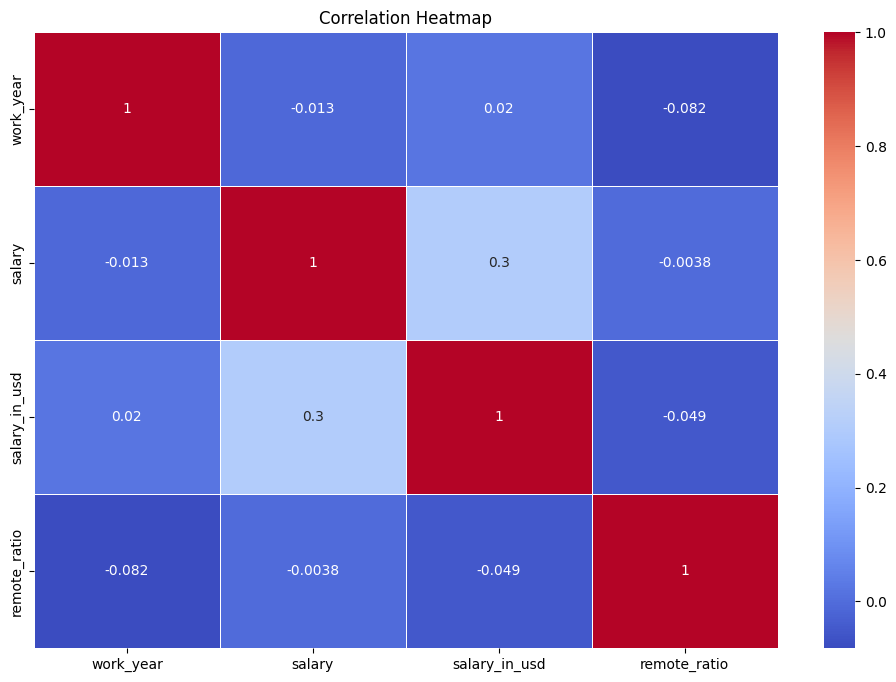

In [11]:
numerical_features = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_features)
cor_matrix= df[numerical_features].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()